# Goal

This script's goal is to compare the ECCO and NSIDC (conversed grid) sea ice velocity data for 1992. 

These three tasks complete the goal - a) first, it reads ECCO and NSIDC daily sea ice velocity from my computer's directory; b) then, it plays a slideshow of the daily sea ice velocity from both sources and c)finally, it compares the daily sea ice velocity (e.g., spatial maps, difference) from both sources. 

## Load data: ECCO

First, I am loading the data from "ECCO Sea Ice Velocity Merged" from my computer. It is also available in the shared drive. 

In [1]:
%%time
import os  
import xarray as xr  
import netCDF4  
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from datetime import datetime

CPU times: user 992 ms, sys: 346 ms, total: 1.34 s
Wall time: 1.93 s


Go to the directory

In [2]:
# Go to the current working directory
ecco_dir = '/Users/aahmed78/Desktop/ECCO/ECCO Sea Ice Velocity/data/'
os.chdir(ecco_dir)
# Am I really in the directory?
! pwd

/Users/aahmed78/Desktop/ECCO/ECCO Sea Ice Velocity/data


In [3]:
# Load the NetCDF file using xarray
year = 1992
file_name = ecco_dir + 'ecco_sea_ice_velocity_{y}.nc'.format(y=year)
ds = xr.open_dataset(file_name)

# Have a closer look at the ds
ds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 5, time: 366, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 2 5 6 7 10
  * time       (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    SIuice     (time, tile, j, i_g) float32 ...
    SIvice     (time, tile, j_g, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            1992-01-02T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea-Ice Velocity - Daily Mean llc90 Gr...
    uuid:                         a029ca02-4050-11eb-ac63-0cc47a3f479b

### ECCO variables

Just checking each variables from the NetCDF files

In [4]:
ds.SIuice.shape

(366, 5, 90, 90)

### ECCO datetime

In [5]:
ds.time.shape # or, try with ds.time.values

(366,)

Add a new variable "datetime" which will only contain the date as this format yyyy-dd-mm. Because this formatting is clean and easy to work with. Specially, in the figure title it has more control. 

In [6]:
from datetime import datetime
# To see the dates in the desired format
formatted_dates = ds.time.values.astype('datetime64[D]').astype(str)
ds = ds.assign_coords(datetime=('time', formatted_dates))
# ds.datetime

In [7]:
ds # Look, it will have a new coords now. 
# The new coords 'datetime' is added and we will be using it instead of 'time';

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 5, time: 366, nv: 2, nb: 4)
Coordinates: (12/14)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 2 5 6 7 10
  * time       (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    ...         ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
    datetime   (time) <U28 '1992-01-01' '1992-01-02' ... '1992-12-31'
Dimensions without coordinates: nv, nb
Data variables:
    SIuice     (time, tile, j, i_g) float32 ...
    SIvice     (time, tile, j_g, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            1992-01-02T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea-Ice Velocity - Daily Mean llc90 Gr...
    uuid:                         a029ca02-4050-11eb-ac63-0cc47a3f479b

In [8]:
ds.XC.sel(tile = 5)

<xarray.DataArray 'XC' (j: 90, i: 90)>
[8100 values with dtype=float32]
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 5
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
Attributes:
    long_name:              longitude of tracer grid cell center
    units:                  degrees_east
    coordinate:             YC XC
    bounds:                 XC_bnds
    comment:                nonuniform grid spacing
    coverage_content_type:  coordinate
    standard_name:          longitude

## Velocity component: ECCO

Let's work with the U and V velocity component of ECCO

In [9]:
ds.data_vars

Data variables:
    SIuice   (time, tile, j, i_g) float32 ...
    SIvice   (time, tile, j_g, i) float32 ...

In [9]:
# Extract the data from SIuice (use .cell)
# index = 2 is the Arctic slice
u_ecco_data = ds.SIuice[:, 2, :, :].data
v_ecco_data = ds.SIvice[:, 2, :, :].data
# It is like taking ['SIuice'][all 366 days, Arctic slice, lat, lon]
# So, I ended up with a (366, 90, 90) size variable

# Assign the correct dimensions (time, j_g, i_g)
ds = ds.assign(u_ecco=(('time', 'j', 'i_g'), u_ecco_data))
ds = ds.assign(v_ecco=(('time', 'i_g', 'i'), v_ecco_data))

# View u_ecco variable to be familiar with it
# U_ecco and v_ecco contain all 366 days velocity information for the Arctic tile.
ds.v_ecco


<xarray.DataArray 'v_ecco' (time: 366, i_g: 90, i: 90)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * i         (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * time      (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    datetime  (time) <U28 '1992-01-01' '1992-01-02' ... '1992-12-31'

### Plot ECCO velocity

I just want to plot the u and v map for day=1 (e.g., 01-01-1992) in the Arctic map. So, first, I am selecting the velocity of that day. Also, I am selelcting the Arctic tile from XC and YX. 

In [10]:
# Note, for first day, just take ds.SIuice.isel(time = 0, tile=2) 
# Note, for first five days, take ds.SIuice.isel(time=slice(0,5), tile=2) 

# Extract the corresponding XG and YG coordinates for the 3rd tile
XC = ds['XC'].isel(tile=2).values
YC = ds['YC'].isel(tile=2).values
XC.shape
# QUESTION: Why do XC still contain 5 tiles when I take ds.XC?

(90, 90)

Using the plot function to check the sea ice velocity of Day = 1 in the Arctic 

In [11]:
plot_tile = 6
plot_time = ds.datetime[0] # first day = 01-01-1992
ds.datetime[0].data

array('1992-01-01', dtype='<U28')

Import iportant plotting libraries

In [17]:
# From https://scitools.org.uk/cartopy/docs/latest/index.html
# From https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  

Make cool land features

In [18]:
# I want my land surface to be light Brown shade
# Good help https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.to_rgba.html
land_rgb = mcolors.to_rgba((222/255, 184/255, 135/255))

# Define the land feature with the new light brown color
# From https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.feature.NaturalEarthFeature.html
land_feature = cfeature.NaturalEarthFeature(
    'physical', 
    'land', 
    '110m', # My options are 10m, 50m, or 110m. Note that, 10m takes a lot of time
    edgecolor='face', 
    facecolor=land_rgb
)

Custom make grid lines that looks journal standard 

Plot u and v components of the velocity for day = 1

/var/folders/jj/ytpz490148s8zhshb_r84s3m0000gq/T/ipykernel_92069/416057071.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.925, 1])


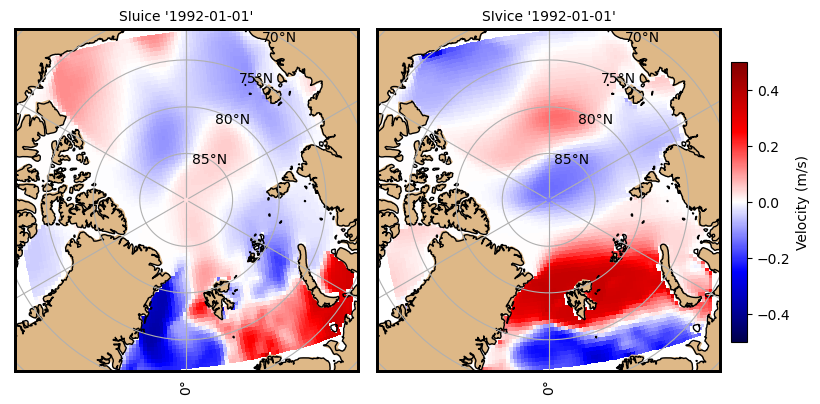

In [25]:
# Define parameters for plotting
plot_time = ds.datetime.isel(time=0).values  # Get the actual date for the first time index
plot_tile = 2
variables = ['SIuice', 'SIvice']
titles = ['SIuice', 'SIvice']

# Set up the figure and projection
fig, axes = plt.subplots(1, 2, figsize=(8, 4), 
                         subplot_kw={'projection': ccrs.NorthPolarStereo()})

# Box on with linewidth = 2, just like MATLAB
for ax_index in range(2):
    for spine in axes[ax_index].spines.values():
        spine.set_visible(True)  # Turn on the border (box) for all sides
        spine.set_linewidth(2) 
        
# Loop through each axis and variable
for ax_index, variable in zip([0, 1], variables):
    ds_subset = ds.isel(tile=plot_tile, time=0)
    pcm = axes[ax_index].pcolormesh(ds_subset['XC'].values, 
                                    ds_subset['YC'].values, 
                                    ds_subset[variable].values, 
                                    transform=ccrs.PlateCarree(), 
                                    cmap='seismic', 
                                    vmax=0.5, vmin=-0.5,
                                    shading='auto')
    axes[ax_index].add_feature(land_feature)
    axes[ax_index].coastlines()
    axes[ax_index].set_title(titles[ax_index] + ' ' + np.array2string(plot_time), fontsize=10)
    
    # Add gridlines
    gl = axes[ax_index].gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

# Add a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(pcm, cax=cbar_ax)
cbar.set_label('Velocity (m/s)')
plt.tight_layout(rect=[0, 0, 0.925, 1])
# Show the plot with colorbar
plt.show()

Previous naive attemp to prepare daily velocity plot

In [ ]:
# # Creating the subplot with 8 inch by 4 inch size in the paper
# fig, axes = plt.subplots(1, 2, figsize=(8, 4), 
#                          subplot_kw={'projection': ccrs.NorthPolarStereo()})
# # Plot u velocity at day = 1
# pcm1 = axes[0].pcolormesh(ds['XC'].isel(tile=2).values, 
#                           ds['YC'].isel(tile=2).values, 
#                           ds.SIuice.isel(time=0, tile=2), 
#                           transform=ccrs.PlateCarree(), 
#                           cmap='seismic', 
#                           vmax=0.5, vmin=-0.5,
#                           shading='auto')
# axes[0].add_feature(land_feature)  # Add light brown land
# axes[0].coastlines()
# axes[0].set_title('SIuice' + ' ' + np.array2string(plot_time), fontsize=10)
# my_gridlines(axes[0]) 

# # Add a colorbar
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
# cbar = fig.colorbar(pcm2, cax=cbar_ax)
# cbar.set_label('Velocity (m/s)')
# plt.tight_layout(rect=[0, 0, 0.925, 1])  # Leave space for the colorbar on the right
# plt.show()


Speed calculation. Where, speed = sqrt(u_ecco_first_day^2+v_ecco_first_day^2)

In [ ]:
vel = np.sqrt(u_ecco_first_day**2 + v_ecco_first_day**2)

## Load data: NSIDC

Now, it is time to call the NSIDC polar pathfinder data from year 1992. And perform similar operation like what I have done for the ECCO data.

In [ ]:
# Go to the current working directory
os.chdir("/Users/aahmed78/Desktop/ECCO/NSIDC Daily Sea Ice Motion/data/")
# Am I really here? (Cool directory checking code - https://www.tutorialspoint.com/python/os_getcwd.htm)
print("Current Working Directory:", os.getcwd())

In [ ]:
ls

In [ ]:
# Load the NetCDF file using xarray
file_name = 'icemotion_daily_nh_25km_19920101_19921231_v4.1.nc'  # Specify the file name
ds = xr.open_dataset(file_name)

# Have a closer look at the ds
ds

### NSIDC variables

Just checking each variables from the NetCDF files

In [ ]:
ds['u'].shape

In [ ]:
# Will be working with the same datetime
ds = ds.assign(datetime_nsidc=('time', datetime_ecco))

In [ ]:
ds

## Velocity component: NSIDC

Let's work with the U and V velocity component of NSIDC

In [ ]:
# Extract the data from SIuice
# index = 2 is the Arctic slice
u_nsidc_data = ds['u'][:, :, :].data
v_nsidc_data = ds['u'][:, :, :].data
# It is like taking ['u'][all 366 days, lat, lon] 
# Notice the difference against the nsidc data which had tiles
# So, I ended up with a (366, 361, 361) size variable

# Assign the correct dimensions (time, j_g, i_g)
ds = ds.assign(u_nsidc=(('time', 'y', 'x'), u_nsidc_data))
ds = ds.assign(v_nsidc=(('time', 'y', 'x'), v_nsidc_data))

# View u_ecco variable to be familiar with it
# U_nsidc and v_nsidc contain all 366 days velocity information for 1992.
ds.u_nsidc


### Practice plot